'''1. Analyze business.json to find the total number of reviews for all businesses. The output
should be in the formof a Spark DataFrame with one value representing the count.'''

ssh gegy@130.226.142.166 -p 8022 -i sshkey
pyspark

In [ ]:
bdf = spark.read.json("/datasets/yelp/business.json")

# get the column names in the file

bdf.agg({'review_count': 'sum'}).show()

In [3]:
'''Analyze business.json to find all businesses that have received 5 stars and that have
been reviewed by 1000 or more users. The output should be in the formof DataFrame of
(name, stars, review count).'''

'Analyze business.json to find all businesses that have received 5 stars and that have\nbeen reviewed by 1000 or more users. The output should be in the formof DataFrame of\n(name, stars, review count).'

In [4]:
print("3.2.1")
bdf = spark.read.json("/datasets/yelp/business.json")
bdft = bdf.filter('stars == 5 and review_count >= 1000')

from pyspark.sql.functions import col

bdf.filter('stars == 5 and review_count >= 1000').select(col("name"),col("stars"),col("review_count")).show()

NameError: name 'bdf' is not defined

In [5]:
'''Analyze user.json to find the influencerswho have writtenmore than 1000 reviews. The
output should be in the formof DataFrame of user id.'''

'Analyze user.json to find the influencerswho have writtenmore than 1000 reviews. The\noutput should be in the formof DataFrame of user id.'

In [6]:
udf = spark.read.json("/datasets/yelp/user.json")
print("3.2.2")
udf.filter('review_count > 1000').select(col("user_id")).show()
print("3.2.2")
udfres = udf.filter('review_count > 1000').select(col("user_id"))

NameError: name 'spark' is not defined

In [7]:
'''Analyze review.json, business.json, and a view created from your answer to Q3 to
find the businesses that have been reviewed by more than 5 influencer users.'''

'Analyze review.json, business.json, and a view created from your answer to Q3 to\nfind the businesses that have been reviewed by more than 5 influencer users.'

In [ ]:
rdf = spark.read.json("/datasets/yelp/review.json") # contains the reviews 
# rdf.schema.names
# rdf business_id, review_id ,user_id
# rdf.count() - 6685900 
# bdf.count() - 192609 # business_id

# udfr # 1420
df_bus_merge = rdf.join(bdf,['business_id'],how='inner')
# df_bus_merge.count() # 6685900
# df_bus_merge.schema.names
df_merged = df_bus_merge.join(udfres,['user_id'],how='inner')
# df_merged.count() 133576
df_merged_count = df_merged.groupBy('business_id').count()
#
df_merged_count.filter('count > 5').show()

In [8]:
'''Analyze review.json and user.json to find an ordered list of users based on the average
star counts they have given in all their reviews.'''

'Analyze review.json and user.json to find an ordered list of users based on the average\nstar counts they have given in all their reviews.'

In [ ]:
# rdf.count() - 6685900 
# udf.count() - 1637138
# udf.schema.names # average_stars
# udf.select("average_stars").show()
# I dont think the review.json is necceserry here since users df contains the average stars
rdf.show()
u_temp = udf.sort(col("average_stars").desc())
# I made a new df since if you print it it looks like a mess
u_temp.select(col("average_stars"),col("user_id")).show()

## 3.2.1 Data Exploration

What is the percentage of reviews containing a variant of the word "authentic"? How
many reviews contain the string "legitimate" grouped by businesses type (type of cuisine)?

PROBLEM: No "cusine type"  or "business type" in the dataset
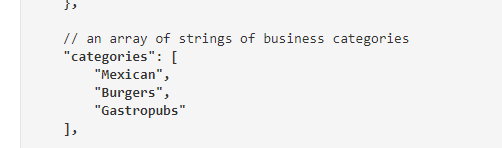

In [ ]:
# a
rdf = spark.read.json("/datasets/yelp/review.json")
rdf.createOrReplaceTempView("reviews")
bdf = spark.read.json("/datasets/yelp/business.json")
bdf.createOrReplaceTempView("business")

# 
bdf.select(col("categories"))

# example line 
rsql_df = spark.sql("SELECT * FROM reviews WHERE funny = 5") # this is just an exaple
rsql_df.select(col("funny"),col("user_id")).show()


# Solution
df1 = spark.sql("SELECT * FROM reviews")
df1.schema.names
df2 = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%'")
# its super sloooooooowwwww, how can I add these to variables ? 
print("Ratio of reviews which contains 'authetnic' is ", (df2.count() / df1.count())*100)



# solution 2 # its not gooooood
all_reviews_count = spark.sql("SELECT count(*) FROM reviews")
auth_reviews_count = spark.sql("SELECT count(*) FROM reviews WHERE text LIKE '%authentic%'")
# still super sloooow 
t = spark.sql("SET @res = (SELECT count(*) FROM reviews)")

############################################################## b
# merge
df = rdf.join(bdf,['business_id'],how='inner')
df.createOrReplaceTempView("rewBusiness")
# res is not good, since categories contains list of strings, so I dont know how should we split them by "cusion type "
res = spark.sql("SELECT R.categories, count(R.review_id) FROM rewBusiness R WHERE R.text LIKE '%legitimate%' GROUP BY R.categories")
res = df3.agg({"count(review_id)":"sum"}).collect()
print(res) #??? seems good.

In [ ]:
ddd = spark.read.format("json").option("inferSchema", "true").option("multiLine", "true").load("/datasets/yelp/business.json")

In [ ]:
categories = bdf.select("categories").rdd.flatMap(lambda x: x).collect()

c_l = []
for i in categories:
    try:
        for c in i.split(", "):
            c_l.append(c)
    except:
        continue

c = Counter(c_l)
print(c.most_common(10))

#
from pyspark.sql.functions import split, explode

bdf2 = bdf.withColumn('cat_new',explode(split('categories',', ')))

bdf2.select(col('cat_new')).show()

rews = spark.sql("SELECT * FROM reviews WHERE text LIKE '%legitimate%'")

>>> rews.schema.names
# rews.count() --- 4578
# ['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']
bdf2.schema.names
#['address', 'attributes', 'business_id', 'categories', 'city', 
# 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state', 'cat_new']
# bdf2.count() -- 788359
merge =  = rews.join(bdf2,['business_id'],how='inner')
# merge.count() -- 21663

categories = merge.select("cat_new").rdd.flatMap(lambda x: x).collect()

from collections import Counter
c_l = []
for i in categories:
    c_l.append(i)

c = Counter(c_l)
print(c.most_common(40))

" Answer RAW"
# [('Restaurants', 2250), ('Food', 829), ('Nightlife', 750), ('Bars', 661), ('Shopping', 419), ('Event Planning & Services', 390), ('Home Services', 379), ('American (New)', 360), ('Arts & Entertainment', 337), ('American (Traditional)', 323), ('Hotels & Travel', 319), ('Automotive', 316), ('Breakfast & Brunch', 309), ('Beauty & Spas', 307), ('Health & Medical', 280), ('Sandwiches', 238), ('Pizza', 217), ('Italian', 209), ('Mexican', 207), ('Local Services', 203)]
>>> print(c.most_common(40))
[('Restaurants', 2250), ('Food', 829), ('Nightlife', 750), ('Bars', 661), ('Shopping', 419), 
 ('Event Planning & Services', 390), ('Home Services', 379), ('American (New)', 360), 
 ('Arts & Entertainment', 337), ('American (Traditional)', 323), 
 ('Hotels & Travel', 319), ('Automotive', 316), ('Breakfast & Brunch', 309), 
 ('Beauty & Spas', 307), ('Health & Medical', 280), ('Sandwiches', 238), 
 ('Pizza', 217), ('Italian', 209), ('Mexican', 207), ('Local Services', 203), 
 ('Active Life', 196), ('Coffee & Tea', 194), ('Hotels', 189), ('Burgers', 180), 
 ('Auto Repair', 172), ('Japanese', 166), ('Seafood', 157), ('Real Estate', 152), 
 ('Sushi Bars', 137), ('Chinese', 136), ('Desserts', 133), ('Asian Fusion', 130), 
 ('Specialty Food', 126), ('Lounges', 124), ('Professional Services', 123), 
 ('Steakhouses', 116), ('Cafes', 114), ('Doctors', 114), ('Casinos', 110), ('Wine & Spirits', 109)]

restaurrant_categories = 
'Breakfast & Brunch'
'Sandwiches'
'Coffee & Tea'
'Burgers'
'Seafood'
'Sushi Bars'
'Steakhouses'

cousine_types = [
'American (New)',
'American (Traditional)',
'Italian',
'Mexican',
'Japanese',
'Chinese',
'Thai',
'Indian',
'French',
'Korean',
'Mediterranean',
'Soul']

m = merge.filter(merge.cat_new.isin(cousine_types))
m.groupBy("cat_new").count().show()

In [ ]:
#b
rews = spark.sql("SELECT * FROM reviews WHERE text LIKE '%legitimate%'")
from pyspark.sql.functions import split, explode
bdf2 = bdf.withColumn('cat_new',explode(split('categories',', ')))
merge =  = rews.join(bdf2,['business_id'],how='inner')
# collect all categories
categories = merge.select("cat_new").rdd.flatMap(lambda x: x).collect()

from collections import Counter
c_l = []
for i in categories:
    c_l.append(i)

c = Counter(c_l)
e = 40
print("first ",e," most common categories in order")
print(c.most_common(40))

# define cousie types manually

cousine_types = [
'American (New)',
'American (Traditional)',
'Italian',
'Mexican',
'Japanese',
'Chinese',
'Thai',
'Indian',
'French',
'Korean',
'Mediterranean',
'Soul']

m = merge.filter(merge.cat_new.isin(cousine_types))
m = m.groupBy("cat_new").count()
m.sort(col("count").desc()).show(truncate=False)

Is there a difference in the amount of authenticity language used in the different areas?
(e.g., by state, north/south, urban/rural)
Note: As part of answering this question, you should compute the full cube combining
the location of the business and whether the review contains authenticity language, and
use this to aggregate their counts per state and city.

In [ ]:
rdf = spark.read.json("/datasets/yelp/review.json")
rdf.createOrReplaceTempView("reviews")
bdf = spark.read.json("/datasets/yelp/business.json")
bdf.createOrReplaceTempView("business")

rdf_a = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' OR text LIKE '%legitimate%' OR text LIKE '%accent%'")
# count = 121075
bdf = spark.sql("SELECT * FROM business WHERE state IS NOT NULL OR city IS NOT NULL")

merge_auth = rdf_a.join(bdf,['business_id'],how='inner')
# count 121075
# merge_auth.groupBy("state").count()
# res = merge.groupBy("state","city").agg({'review_id': 'sum'}).collect()
auth_df = merge_auth.cube("state").count().orderBy("state") # it can have multipe columns, I just skipped it
auth_df = auth_df.withColumnRenamed("count","auth_lan_count")
auth_df = auth_df.withColumnRenamed("state","state_auth")

# sec part
rdf = spark.sql("SELECT * FROM reviews")
# count 6685900
merge_all = rdf.join(bdf,['business_id'],how='inner')
all_r = merge_all.cube("state").count().orderBy("state") # it can have multipe columns, I just skipped it
all_r = all_r.withColumnRenamed("count","all_lan_count")

all_r.show()
auth_df.show()

#uni = all_r.union(auth_df).distinct()
# all_r.join(auth_df,all_r.state ==  auth_df.state,"fullouter").show(truncate=False)
join = all_r.join(auth_df,all_r.state ==  auth_df.state_auth,"fullouter")
join = join.fillna(0, subset=['all_lan_count'])\
       .fillna(0, subset=['auth_lan_count'])

from pyspark.sql.functions import coalesce
from pyspark.sql.functions import col
from pyspark.sql.functions import lit
#join = join.withColumn('Ratio of using auth language compared to all review', coalesce(col('auth_lan_count'), lit(0)) / coalesce(col('all_lan_count'), lit(1)))
join = join.withColumn('Ratio', (coalesce(col('auth_lan_count'), lit(0)) / coalesce(col('all_lan_count'), lit(1))*100))

print("Result of ratio of using authenticity language compared to all review in state level")
join.sort(join.Ratio.desc()).show(truncate=False)

In [ ]:
[('Restaurants', 2250), ('Food', 829), ('Nightlife', 750), ('Bars', 661), ('Shopping', 419), 
 ('Event Planning & Services', 390), ('Home Services', 379), ('American (New)', 360), 
 ('Arts & Entertainment', 337), ('American (Traditional)', 323), ('Hotels & Travel', 319), 
 ('Automotive', 316), ('Breakfast & Brunch', 309), ('Beauty & Spas', 307), ('Health & Medical', 280),
 ('Sandwiches', 238), ('Pizza', 217), ('Italian', 209), ('Mexican', 207), ('Local Services', 203), 
 ('Active Life', 196), ('Coffee & Tea', 194), ('Hotels', 189), ('Burgers', 180), 
 ('Auto Repair', 172), ('Japanese', 166), ('Seafood', 157), ('Real Estate', 152), 
 ('Sushi Bars', 137), ('Chinese', 136), ('Desserts', 133), ('Asian Fusion', 130), 
 ('Specialty Food', 126), ('Lounges', 124), ('Professional Services', 123), 
 ('Steakhouses', 116), ('Cafes', 114), ('Doctors', 114), ('Casinos', 110), 
 ('Wine & Spirits', 109), ('Beer', 109), ('Barbeque', 108), ('Salad', 108), 
 ('Bakeries', 108), ('Car Dealers', 105), ('Fast Food', 103), ('Pubs', 102), 
 ('Cocktail Bars', 101), ('Massage', 93), ('Sports Bars', 93), ('Caterers', 90), 
 ('Venues & Event Spaces', 89), ('Home & Garden', 86), ('Day Spas', 85), 
 ('Vegetarian', 82), ('Music Venues', 80), ('Fitness & Instruction', 80),
 ('Hair Salons', 79), ('Fashion', 79), ('Apartments', 77), ('Pets', 77), 
 ('Vegan', 76), ('Wine Bars', 74), ('Mediterranean', 74), ('Chicken Wings', 74), 
 ('Local Flavor', 73), ('Dance Clubs', 73), ('Oil Change Stations', 70), 
 ('Thai', 68), ('Buffets', 67), ('Auto Parts & Supplies', 67),
 ('Juice Bars & Smoothies', 65), ('Diners', 64), ('Financial Services', 63), 
 ('Resorts', 61), ('Delis', 60), ('Grocery', 59), ('Korean', 59), 
 ('Ice Cream & Frozen Yogurt', 58), ('Gastropubs', 58), ('Nail Salons', 58), 
 ('Gluten-Free', 55), ('Performing Arts', 54), ('Hair Removal', 54), 
 ('Skin Care', 54), ('Canadian (New)', 54), ('Vietnamese', 53), 
 ('Gyms', 52), ('Medical Centers', 51), ('Tires', 49), 
 ('Contractors', 49), ('Pet Services', 48), ('Transportation', 47), 
 ('Education', 47), ('French', 47), ('Indian', 46), 
 ('Car Rental', 46), ('Noodles', 45), ('Ethnic Food', 45), ('Soup', 44)]

In [ ]:
        
rdd=spark.sparkContext.parallelize(categories)
print(rdd.take(1))
rdd2=rdd.flatMap(lambda x: x.split(", "))
print(rdd2.take(1))
rdd3=rdd2.flatMap(lambda x: x.split(", "))
list_of_categories = []
for element in rdd.collect():
    list_of_categories.append(element)
c = 0

for i in list_of_categories:
    if len(i) == 0:
        continue
        c +=1
    else:
        print(c)
        print(i.split())
        c +=1
        
        

for i in categories:
    try:
        print(i.split(", "))
    except:
        continue
    
        
        
from collections import Counter
l = []
for i in categories:
    t = str(i)
    for c in t.split(","):
        l.append(c)
        
c = Counter(l)
print(c.most_common(40))


rdd=spark.sparkContext.parallelize(bdf.select(col("categories")))

In [ ]:
rdd2=bdf.select(col("categories")).flatMap(lambda x: x.split(" "))
for element in rdd2.collect():
    print(element)

In [12]:
"How many reviews contain the string 'legitimate' grouped by restaurant categories?"
# since categories are a list of strings ( check above ) I dont know how should I handle this question

"How many reviews contain the string 'legitimate' grouped by restaurant categories?"

In [10]:
s = ["he, word"]
s.split(",")

AttributeError: 'list' object has no attribute 'split'

In [14]:
for i in s:
    t = str(i)
    for c in t.split(", "):
        print(c)

he
word


In [16]:
from matplotlib.cbook import flatten
from collections import Counter
import pandas as pd
din={'x':[['a','b','c'],['a','e','d', 'c']], 'y': [['h','j'],['h','j','j']]}

def foo(x):
    df = pd.DataFrame()
    for a,i in x.items() :
        u=pd.DataFrame.from_dict(dict(Counter([*flatten(i)])), orient ='index').reset_index().rename(columns ={'index':a,0:str(a)+'_number'})
        df=pd.concat([df,u])
    return df
foo(din)

,x,x_number,y,y_number
0,a,2.0,NaN,NaN
1,b,1.0,NaN,NaN
2,c,2.0,NaN,NaN
3,e,1.0,NaN,NaN
4,d,1.0,NaN,NaN
0,NaN,NaN,h,2.0
1,NaN,NaN,j,3.0


Can you identify a difference in the relationship between authenticity language (words
such as "authentic" or "legitimate" or their derived forms) and typically negative words
(like "dirty", "kitsch", "cheap", "rude", "simple" or similar), in restaurants serving south
american or south asian cuisine than in restaurants serving european cuisine? And to
what degree?

In [ ]:
# read in two different dataframe, which are cointains "authentic" and "legitimate"
rdf = spark.read.json("/datasets/yelp/review.json")
rdf.createOrReplaceTempView("reviews")

bdf = spark.read.json("/datasets/yelp/business.json")
bdf.createOrReplaceTempView("business")

bdf = spark.sql("SELECT * FROM business")

# rdf_a = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' OR text LIKE '%accent%'")
rdf_a = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' OR text LIKE '%accent%' AND (text LIKE '%dirty%' \
                    OR text LIKE '%cheap%' OR text LIKE '%kitsch%' \
                    OR text LIKE '%rude%' OR text LIKE '%simple%')") # 102374
rdf_a = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' AND (text LIKE '%dirty%' \
                    OR text LIKE '%cheap%' OR text LIKE '%kitsch%' \
                    OR text LIKE '%rude%' OR text LIKE '%simple%')") # 9321 after searchin filter only restaurants

rdf_l = spark.sql("SELECT * FROM reviews WHERE text LIKE '%legitimate%' AND (text LIKE '%dirty%' \
                    OR text LIKE '%cheap%' OR text LIKE '%kitsch%' \
                    OR text LIKE '%rude%' OR text LIKE '%simple%')")

rdf_a.toPandas().to_csv("rdf_a.csv", header=True, index=False, encoding='utf-8')
rdf_l.toPandas().to_csv("rdf_l.csv", header=True, index=False, encoding='utf-8')
bdf.toPandas().to_csv("bdf.csv", header=True, index=False, encoding='utf-8')

rdf_a = pd.read_csv('rdf_a.csv') # 116677
rdf_l = pd.read_csv('rdf_l.csv')
bdf = pd.read_csv('bdf.csv') # 192609

merge_a = pd.merge(bdf, rdf_a, on="business_id", how="inner") # 11677
merge_l = pd.merge(bdf, rdf_l, on="business_id", how="inner")
# filter for only restaurants

merge_a = merge_a[merge_a["categories"].str.contains("restaurant", case=False)==True] #
# merge_l = merge_l[merge_l["categories"].str.contains("Restaurants|Restaurant", case=False)==True]
merge_l = merge_l[merge_l["categories"].str.contains("restaurant", case=False)==True]
# df[(df['col_name'].str.contains('apple')) & (df['col_name'].str.contains('banana'))]

In [ ]:
# read in two different dataframe, which are cointains "authentic" and "legitimate"
rdf = spark.read.json("/datasets/yelp/review.json")
rdf.createOrReplaceTempView("reviews")

bdf = spark.read.json("/datasets/yelp/business.json")
bdf.createOrReplaceTempView("business")

############ BADS 
rdf = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' OR text LIKE '%legitimate%' \
                    AND (text LIKE '%dirty%' \
                    OR text LIKE '%cheap%' OR text LIKE '%kitsch%' \
                    OR text LIKE '%rude%' OR text LIKE '%simple%' OR text LIKE '%bad%')")

bdf = spark.sql("SELECT * FROM business")

rdf.toPandas().to_csv("rdf_hip.csv", header=True, index=False, encoding='utf-8')
bdf.toPandas().to_csv("bdf.csv", header=True, index=False, encoding='utf-8')
import pandas as pd
rdf = pd.read_csv('rdf_hip.csv')
bdf = pd.read_csv('bdf.csv')

merge_a = pd.merge(bdf, rdf, on="business_id", how="inner")
merge_a = merge_a[merge_a["categories"].str.contains("restaurant", case=False)==True]



merge_a = merge_a.astype({"categories": str})

merge_a['cats'] = merge_a.categories.apply(lambda x: x.split(', '))

s = merge_a.apply(lambda x: pd.Series(x['cats']), axis=1).stack().reset_index(level=1, drop=True)
#s = merge_a.apply(lambda x: pd.Series(x['cats']), axis=1).stack(level=list).reset_index(level=1, drop=True)

s.name = 'cat'
df2 = merge_a.drop('cats', axis=1).join(s)
df2['cat'] = pd.Series(df2['cat'], dtype=object)
# delete restaurants 
df2 = df2[df2.cat != "Restaurants"]
df2.to_csv("bads.csv", header=True, index=False, encoding='utf-8')



list_of_categories =  df2['cat'].tolist()
from collections import Counter

bads = Counter(list_of_categories)
e = 40
print("first ",e," most common categories in order for negative words")
print(bads.most_common(e))

#print(bads['Mexican'])

'''[('Restaurants', 101923), ('Food', 24306), ('Mexican', 23752), ('Nightlife', 14615), 
 ('Bars', 13884), ('Chinese', 13581), ('Italian', 10697), ('Japanese', 8732), 
 ('Thai', 8389), ('Pizza', 7365), ('Seafood', 7104), ('Asian Fusion', 6835), 
 ('Breakfast & Brunch', 5943), ('Specialty Food', 5837), ('Sandwiches', 5760), 
 ('Sushi Bars', 5339), ('Indian', 5265), ('Event Planning & Services', 5014), 
 ('Mediterranean', 4789), ('Vietnamese', 4769), ('Korean', 4251), ('Noodles', 4246), 
 ('Vegetarian', 4154), ('Desserts', 4099), ('Ethnic Food', 3950), ('Latin American', 3551), 
 ('American (Traditional)', 3538), ('Salad', 3495), ('American (New)', 3485), ('Barbeque', 3469), 
 ('Middle Eastern', 3458), ('Caterers', 3427), ('Greek', 2880), ('Cafes', 2825), 
 ('Bakeries', 2812), ('Buffets', 2751), ('Soup', 2746), ('Coffee & Tea', 2643), 
 ('Vegan', 2578), ('Fast Food', 2382), ('Tacos', 2321), ('Wine Bars', 2255), 
 ('Beer', 2249), ('Wine & Spirits', 2249), ('Ramen', 2151), ('Cocktail Bars', 2111), 
 ('Delis', 2094), ('Dim Sum', 2046), ('Pakistani', 1999), ('Gluten-Free', 1884), 
 ('Grocery', 1861), ('Halal', 1855), ('Pubs', 1841), ('Arts & Entertainment', 1840), 
 ('French', 1764), ('Burgers', 1657), ('Tex-Mex', 1580), ('Caribbean', 1557), 
 ('Shopping', 1505), ('Tapas/Small Plates', 1491), ('Taiwanese', 1465), 
 ('Steakhouses', 1430), ('Szechuan', 1280), ('Tapas Bars', 1224), 
 ('Cantonese', 1162), ('Food Delivery Services', 1136), ('German', 1130), 
 ('Lounges', 1094), ('Sports Bars', 1094), ('Venues & Event Spaces', 1081), 
 ('Diners', 1066), ('Ice Cream & Frozen Yogurt', 1039), ('Hawaiian', 999), 
 ('Chicken Wings', 945), ('Local Flavor', 871), ('Beer Bar', 856), 
 ('Food Trucks', 852), ('Spanish', 814), ('Cajun/Creole', 794), 
 ('Hotels & Travel', 788), ('Filipino', 761), ('Irish', 754), 
 ('Juice Bars & Smoothies', 738), ('Southern', 734), 
 ('Imported Food', 731), ('Bubble Tea', 725), 
 ('Canadian (New)', 698), ('Comfort Food', 681), 
 ('Malaysian', 675), ('New Mexican Cuisine', 656), 
 ('Music Venues', 648), ('Lebanese', 641), 
 ('Beauty & Spas', 619), ('Hot Dogs', 610), ('Active Life', 568), ('Cuban', 559), 
 ('Automotive', 553), ('Street Vendors', 546), ('Peruvian', 531), ('Hotels', 523)]
'''
###### GOODS 

rdf = spark.sql("SELECT * FROM reviews WHERE text LIKE '%authentic%' OR text LIKE '%legitimate%' \
                    AND (text NOT LIKE '%dirty%' \
                    OR text NOT LIKE '%cheap%' OR text NOT LIKE '%kitsch%' \
                    OR text NOT LIKE '%rude%' OR text NOT LIKE '%simple%' OR text NOT LIKE '%bad%')")

rdf.toPandas().to_csv("rdf_hip.csv", header=True, index=False, encoding='utf-8')

import pandas as pd
rdf = pd.read_csv('rdf_hip.csv')
bdf = pd.read_csv('bdf.csv')

merge_a = pd.merge(bdf, rdf, on="business_id", how="inner")

merge_a = merge_a.astype({"categories": str})
merge_a = merge_a[merge_a["categories"].str.contains("restaurant", case=False)==True]

merge_a['cats'] = merge_a.categories.apply(lambda x: x.split(', '))

s = merge_a.apply(lambda x: pd.Series(x['cats']), axis=1).stack().reset_index(level=1, drop=True)
#s = merge_a.apply(lambda x: pd.Series(x['cats']), axis=1).stack(level=list).reset_index(level=1, drop=True)

s.name = 'cat'
df2 = merge_a.drop('cats', axis=1).join(s)
df2['cat'] = pd.Series(df2['cat'], dtype=object)
df2 = df2[df2.cat != "Restaurants"]
df2.to_csv("not_bads.csv", header=True, index=False, encoding='utf-8')



list_of_categories =  df2['cat'].tolist()
from collections import Counter

goods = Counter(list_of_categories)
e = 40
print("first ",e," most common categories in order without negative words")
print(goods.most_common(e))
# print(goods['Mexican'])
print("Generate lists manually by cuisine type, grouped by the origin of the continents")
s_am_list = ["Mexican","New Mexican Cuisine","Peruvian","Cuban"]
s_asian_list = ["Thai", "Indian","Pakistani"]
f_l = ["Mexican","New Mexican Cuisine","Peruvian","Cuban","Thai", "Indian","Pakistani"]
eu = ["Italian","French","Greek","German","Spanish","Irish"]

g = 0
b = 0
for i in f_l:
    g += goods[i]
    b += bads[i]

print("Ratio of negative reviews compared to non negative reviews \n where the origin of the cusine is South America or South Asia: ", b/g)

g = 0
b = 0
for i in eu:
    g += goods[i]
    b += bads[i]
    

print("Ratio of negative reviews compared to non negative reviews \n where the origin of the cusine is Europe: ", b/g)

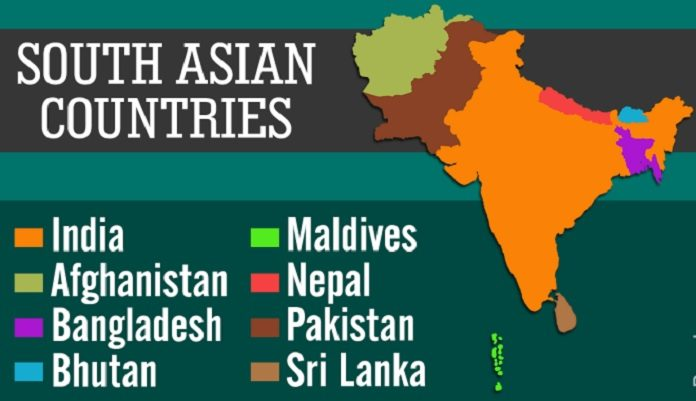